In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import sys
workingdir = '/content/gdrive/My Drive/Colab Notebooks/EVA4/Session8'
sys.path.append(workingdir)

In [0]:
%matplotlib inline
import torch
from utils import datapreparation
from utils import display
from model import dnn
from model import resnet
from utils import training
from utils import evaluate

In [4]:
classes, trainloader, testloader = datapreparation.load()

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
CUDA Available? True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


shape: torch.Size([128, 3, 32, 32])
  cat truck truck   cat   cat


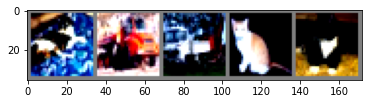

In [5]:
display.show_random_images(trainloader, classes)

In [6]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
net = resnet.ResNet18()
model = net.to(device)
summary(model,input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)

In [8]:
EPOCHS = 25
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    training.train_model(model, device, trainloader, optimizer, criterion, epoch)
    training.test_model(model, device, criterion, testloader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=0.8377454876899719 Batch_id=390 Accuracy=54.61: 100%|██████████| 391/391 [00:29<00:00, 13.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 6602/10000 (66.02%)

EPOCH: 2


Loss=0.6558175683021545 Batch_id=390 Accuracy=74.46: 100%|██████████| 391/391 [00:28<00:00, 13.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 7528/10000 (75.28%)

EPOCH: 3


Loss=0.3923555016517639 Batch_id=390 Accuracy=82.33: 100%|██████████| 391/391 [00:28<00:00, 13.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7605/10000 (76.05%)

EPOCH: 4


Loss=0.3191717267036438 Batch_id=390 Accuracy=88.05: 100%|██████████| 391/391 [00:28<00:00, 13.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7906/10000 (79.06%)

EPOCH: 5


Loss=0.2683212459087372 Batch_id=390 Accuracy=91.56: 100%|██████████| 391/391 [00:28<00:00, 13.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 7705/10000 (77.05%)

EPOCH: 6


Loss=0.25074562430381775 Batch_id=390 Accuracy=94.41: 100%|██████████| 391/391 [00:28<00:00, 13.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 7943/10000 (79.43%)

EPOCH: 7


Loss=0.13714735209941864 Batch_id=390 Accuracy=96.51: 100%|██████████| 391/391 [00:28<00:00, 13.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 7920/10000 (79.20%)

EPOCH: 8


Loss=0.15543662011623383 Batch_id=390 Accuracy=97.48: 100%|██████████| 391/391 [00:28<00:00, 13.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 7971/10000 (79.71%)

EPOCH: 9


Loss=0.057606667280197144 Batch_id=390 Accuracy=98.26: 100%|██████████| 391/391 [00:28<00:00, 13.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0067, Accuracy: 8078/10000 (80.78%)

EPOCH: 10


Loss=0.1204330325126648 Batch_id=390 Accuracy=98.67: 100%|██████████| 391/391 [00:28<00:00, 13.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0069, Accuracy: 8060/10000 (80.60%)

EPOCH: 11


Loss=0.04245980083942413 Batch_id=390 Accuracy=99.05: 100%|██████████| 391/391 [00:28<00:00, 13.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 8186/10000 (81.86%)

EPOCH: 12


Loss=0.06188324838876724 Batch_id=390 Accuracy=99.27: 100%|██████████| 391/391 [00:28<00:00, 13.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 8317/10000 (83.17%)

EPOCH: 13


Loss=0.010441613383591175 Batch_id=390 Accuracy=99.69: 100%|██████████| 391/391 [00:28<00:00, 13.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 8344/10000 (83.44%)

EPOCH: 14


Loss=0.0007269382476806641 Batch_id=390 Accuracy=99.92: 100%|██████████| 391/391 [00:28<00:00, 13.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 8368/10000 (83.68%)

EPOCH: 15


Loss=0.0004220128175802529 Batch_id=390 Accuracy=99.98: 100%|██████████| 391/391 [00:28<00:00, 13.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 8528/10000 (85.28%)

EPOCH: 16


Loss=0.00032150745391845703 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 13.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 8519/10000 (85.19%)

EPOCH: 17


Loss=0.0001678466796875 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 13.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 8520/10000 (85.20%)

EPOCH: 18


Loss=9.362697892356664e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 13.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 8516/10000 (85.16%)

EPOCH: 19


Loss=0.00016736984252929688 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 13.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 8525/10000 (85.25%)

EPOCH: 20


Loss=0.00037047863588668406 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 13.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 8514/10000 (85.14%)

EPOCH: 21


Loss=4.173517299932428e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 13.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 8516/10000 (85.16%)

EPOCH: 22


Loss=0.00011471509787952527 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 13.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 8522/10000 (85.22%)

EPOCH: 23


Loss=0.00015145540237426758 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 13.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 8519/10000 (85.19%)

EPOCH: 24


Loss=0.0002551436482463032 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 13.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 8518/10000 (85.18%)

EPOCH: 25


Loss=4.1460989450570196e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:28<00:00, 13.65it/s]



Test set: Average loss: 0.0059, Accuracy: 8534/10000 (85.34%)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:  plane   car   dog  ship   car
Predicted:  plane   car   dog  ship   car


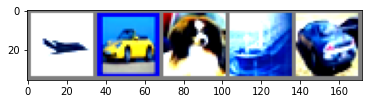

In [9]:
evaluate.show_predicted_actual(model, device, testloader, classes)

In [10]:
evaluate.evaluate_accuracy(model, device, testloader)

Accuracy of the network on the 10000 test images: 85 %


In [11]:
evaluate.evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of plane : 84 %
Accuracy of   car : 100 %
Accuracy of  bird : 77 %
Accuracy of   cat : 74 %
Accuracy of  deer : 87 %
Accuracy of   dog : 69 %
Accuracy of  frog : 77 %
Accuracy of horse : 88 %
Accuracy of  ship : 88 %
Accuracy of truck : 92 %
